In [178]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# Any results you write to the current directory are saved as output.
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

#load data
train = pd.read_csv('../input/train.csv')
test  = pd.read_csv('../input/test.csv')

print(train.columns.values)

interesting_features = ['SalePrice','MSSubClass','LotArea','OverallQual','OverallCond', 'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF']

train[interesting_features]

data_description.txt
test.csv
train.csv

['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeat

,SalePrice,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF
0,208500,60,8450,7,5,196.0,706,0,150
1,181500,20,9600,6,8,0.0,978,0,284
2,223500,60,11250,7,5,162.0,486,0,434
3,140000,70,9550,7,5,0.0,216,0,540
4,250000,60,14260,8,5,350.0,655,0,490
5,143000,50,14115,5,5,0.0,732,0,64
6,307000,20,10084,8,5,186.0,1369,0,317
7,200000,60,10382,7,6,240.0,859,32,216
8,129900,50,6120,7,5,0.0,0,0,952
9,118000,190,7420,5,6,0.0,851,0,140


scatter_matrix


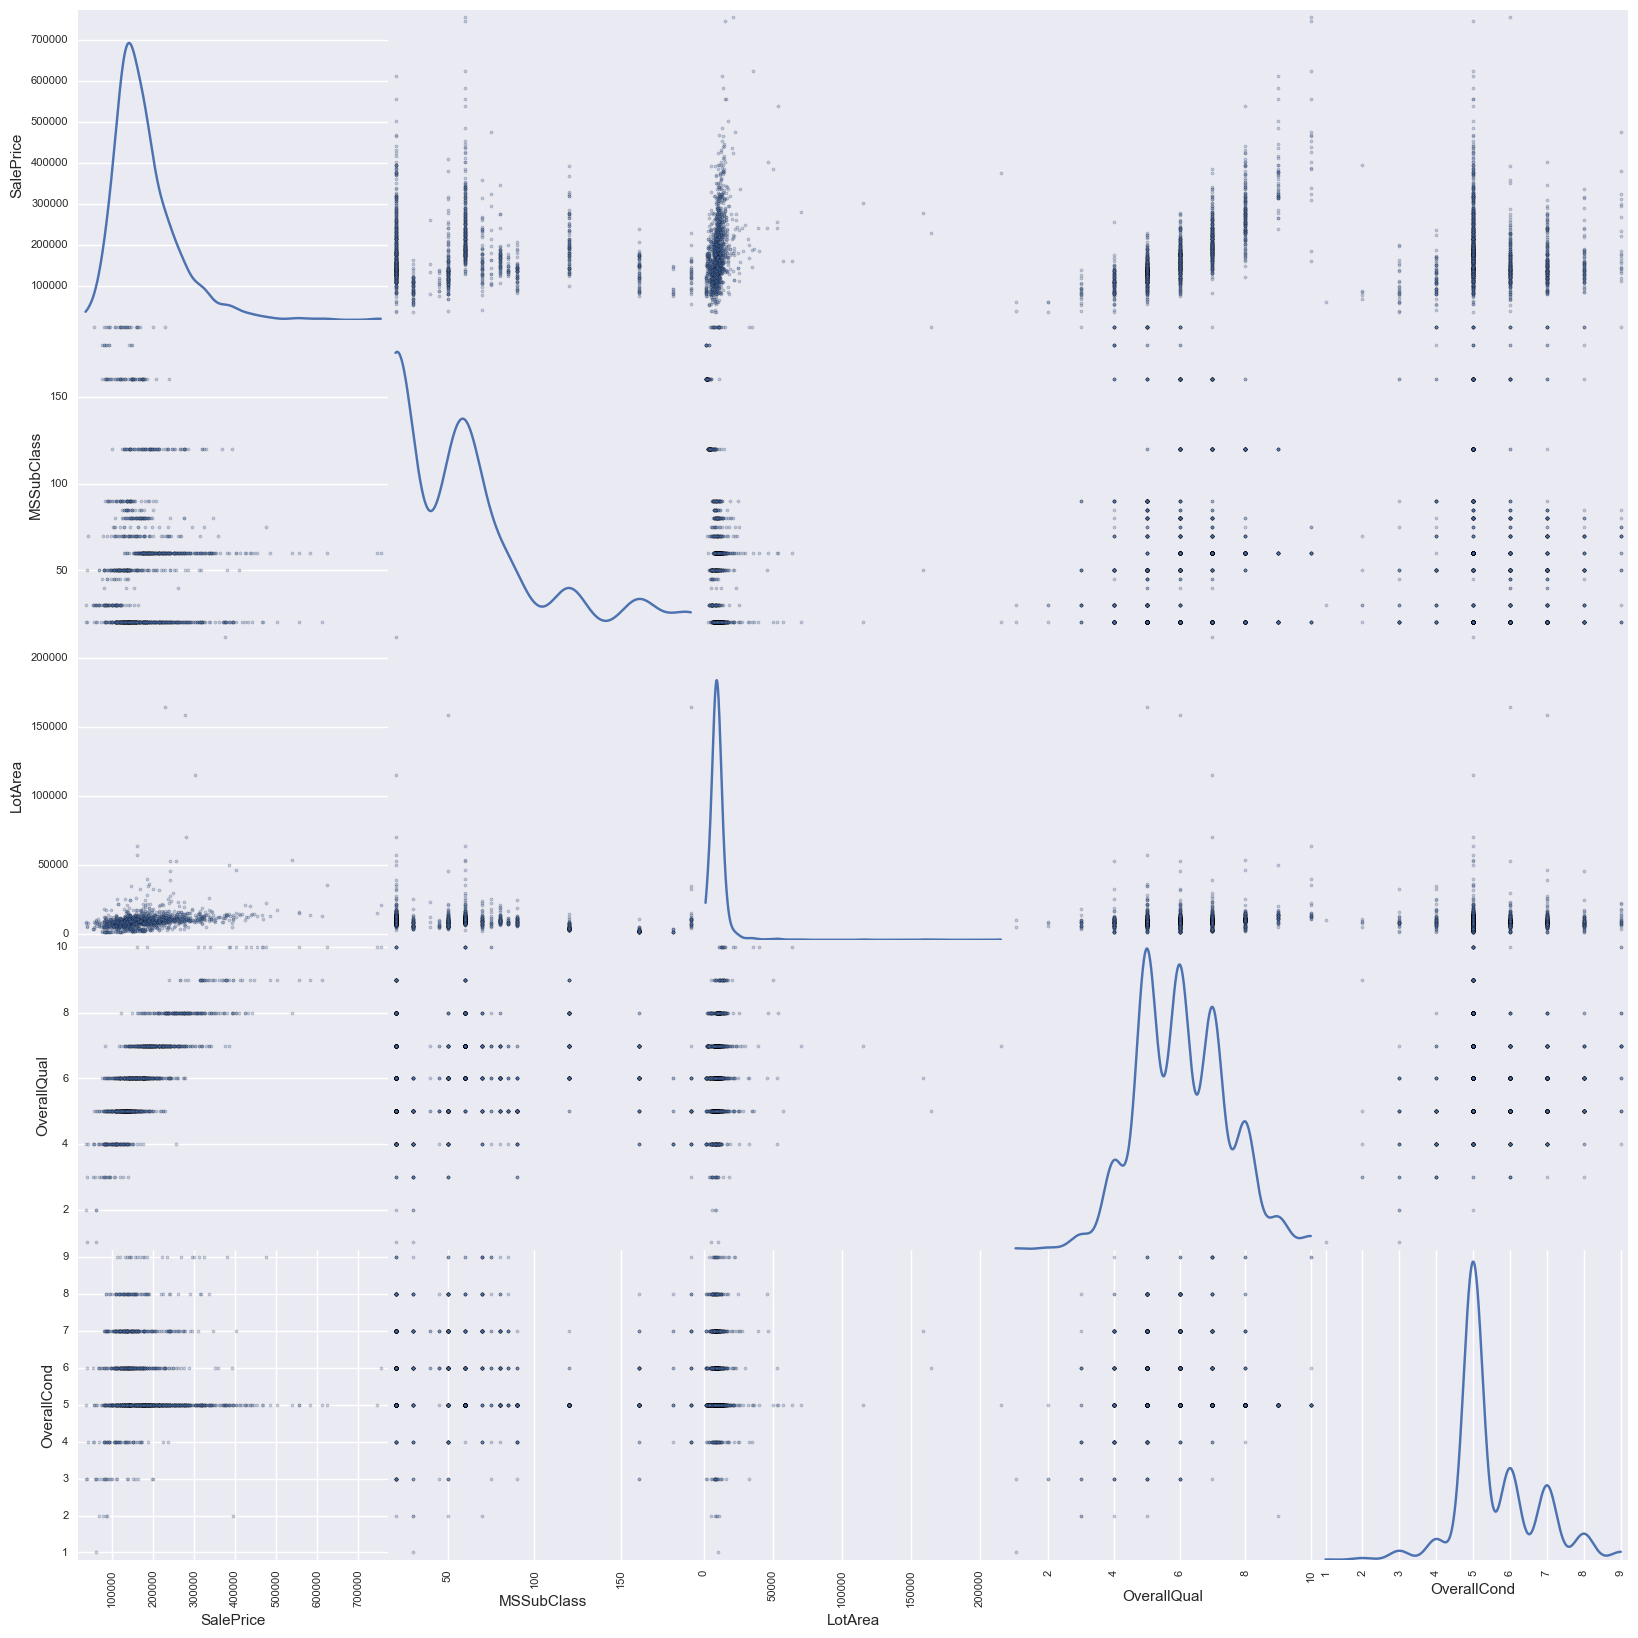

In [172]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(train[interesting_features], alpha = 0.3, figsize = (20,20), diagonal = 'kde');
print('scatter_matrix')

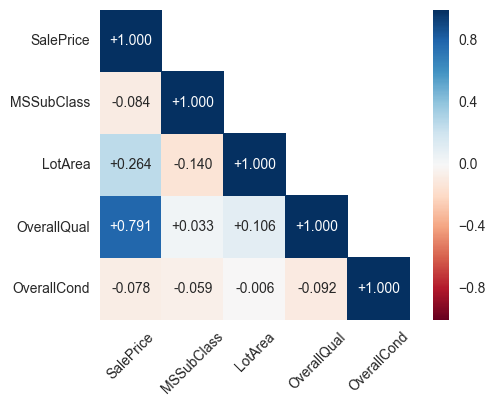

In [173]:
corr = train[interesting_features].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True, cmap='RdBu', fmt='+.3f')
    plt.xticks(rotation=45, ha='center')

In [140]:


#look with our data has null values, 
def remove_null_values(dataset):
    nulls = dataset.isnull().any()
    result = []
    for feature in nulls.axes[0]:
        if nulls[feature]:
            result.append(feature)
    new_dataset = dataset.dropna(subset=result)
    print('\nTotal Features with with null values: {0}, that are {1}'.format(len(result), result))
    return new_dataset



#removed features, too much NaN values into them
train = train.drop(['Alley', 'PoolQC', 'MiscFeature', 'Fence', 'LotFrontage'], axis=1)

#removing some features, too much NaN values into them
train = train.drop(['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'], axis=1)

#formating some features
train.loc[train.Fireplaces == 0, 'FireplaceQu'] = 'NA'

train = has_null_values(train)
train.tail(4)

target = train.SalePrice
train = train.drop(['SalePrice', 'Id'], axis=1)
train


Total Features with with null values: 8, that are ['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical']


,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,84,0,0,0,0,0,12,2008,WD,Normal
5,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,...,30,0,320,0,0,700,10,2009,WD,Normal
6,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,...,57,0,0,0,0,0,8,2007,WD,Normal
7,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,...,204,228,0,0,0,350,11,2009,WD,Normal
8,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,...,0,205,0,0,0,0,4,2008,WD,Abnorml
9,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,...,4,0,0,0,0,0,1,2008,WD,Normal


In [142]:
dummies = pd.get_dummies(train)
dummies

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,1,0,0,0,0,1,0
5,50,14115,5,5,1993,1995,0.0,732,0,64,...,0,0,0,1,0,0,0,0,1,0
6,20,10084,8,5,2004,2005,186.0,1369,0,317,...,0,0,0,1,0,0,0,0,1,0
7,60,10382,7,6,1973,1973,240.0,859,32,216,...,0,0,0,1,0,0,0,0,1,0
8,50,6120,7,5,1931,1950,0.0,0,0,952,...,0,0,0,1,1,0,0,0,0,0
9,190,7420,5,6,1939,1950,0.0,851,0,140,...,0,0,0,1,0,0,0,0,1,0


In [158]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

X = dummies[['MSSubClass','LotArea','OverallQual','OverallCond', 'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF']]
Y = target


clf = RandomForestClassifier(n_estimators=5, random_state=1)
clf = clf.fit(X, Y)
scores = cross_val_score(clf, X, Y)
print(scores)
print(scores.mean())



0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
30       40000
         ...  
1430    192140
1431    143750
1432     64500
1433    186500
1434    160000
1435    174000
1436    120500
1437    394617
1438    149700
1439    197000
1440    191000
1441    149300
1442    310000
1443    121000
1444    179600
1445    129000
1446    157900
1447    240000
1448    112000
1449     92000
1450    136000
1451    287090
1452    145000
1453     84500
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, dtype: int64


/usr/local/lib/python3.5/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


[ 0.00992556  0.0109589   0.01659751]
0.0124939909319
